# Build a multivariable regression model

In [1]:
#import libraries required
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [2]:
#load df into notebook
df = pd.read_csv('C:\\Users\\UltimateKayCorp\\lighthouse-data-notes/forest_fire_clean.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,day_num,area_squared_km,fire_spread
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,4,0.0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,1,0.0,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,5,0.0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,4,0.0,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,6,0.0,0


In [3]:
#drop redundant columns/un-needed columns
df_final = df.drop(columns= ['month','day','area_squared_km','fire_spread'], axis=1)

In [4]:
#Drop duplicate values
df_final = df_final.drop_duplicates()

In [5]:
#Drop all null values (cannot be used in the analysis)
df_final = df_final.dropna(how='any',axis=0) 

In [6]:
#Verify that nf has no null values
df_final.isna().sum()

X            0
Y            0
FFMC         0
DMC          0
DC           0
ISI          0
temp         0
RH           0
wind         0
rain         0
area         0
month_num    0
day_num      0
dtype: int64

In [7]:
df_final.shape
#df.shape

(513, 13)

In [8]:
df_final.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,day_num
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,4.678363,4.300195,90.637427,110.989279,549.155166,9.023587,18.887524,44.348928,4.010526,0.021832,12.891598,7.485380,3.251462
std,2.320059,1.230925,5.540920,64.191013,247.724594,4.575543,5.828128,16.358803,1.796613,0.297107,63.892586,2.275095,2.075038
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,440.900000,6.400000,15.500000,33.000000,2.700000,0.000000,0.000000,7.000000,1.000000
50%,4.000000,4.000000,91.600000,108.300000,664.500000,8.400000,19.300000,42.000000,4.000000,0.000000,0.540000,8.000000,4.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.570000,9.000000,5.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,12.000000,6.000000


In [9]:
df_final.tail()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,day_num
508,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,8,6
509,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,8,6
510,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,8,6
511,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,8,5
512,6,3,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,11,1


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Finding the correlation 
df_final.corr(numeric_only = True)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,day_num
X,1.000000,0.542705,-0.020499,-0.048861,-0.088801,0.006033,-0.051070,0.083757,0.020869,0.065176,0.062930,-0.066942,-0.022520
Y,0.542705,1.000000,-0.045979,0.008210,-0.098496,-0.023142,-0.023871,0.062587,-0.019537,0.033313,0.045168,-0.065383,-0.006672
FFMC,-0.020499,-0.045979,1.000000,0.383641,0.332936,0.532083,0.431609,-0.300827,-0.029208,0.056806,0.040232,0.293428,-0.041606
DMC,-0.048861,0.008210,0.383641,1.000000,0.681741,0.304585,0.469590,0.071711,-0.105111,0.074780,0.073783,0.464361,0.063999
DC,-0.088801,-0.098496,0.332936,0.681741,1.000000,0.228168,0.497584,-0.044067,-0.203010,0.035690,0.050313,0.867865,0.004054
ISI,0.006033,-0.023142,0.532083,0.304585,0.228168,1.000000,0.394217,-0.133363,0.106825,0.067664,0.008411,0.185696,0.033008
temp,-0.051070,-0.023871,0.431609,0.469590,0.497584,0.394217,1.000000,-0.528670,-0.227618,0.069526,0.098222,0.369134,0.052748
RH,0.083757,0.062587,-0.300827,0.071711,-0.044067,-0.133363,-0.528670,1.000000,0.071433,0.099616,-0.075460,-0.100175,0.095224
wind,0.020869,-0.019537,-0.029208,-0.105111,-0.203010,0.106825,-0.227618,0.071433,1.000000,0.061479,0.012699,-0.085160,0.030199
rain,0.065176,0.033313,0.056806,0.074780,0.035690,0.067664,0.069526,0.099616,0.061479,1.000000,-0.007418,0.013187,-0.048206


# Set variables for analysis:
### Question: Can we predict for 'ISI' using 'DC' and 'month_num'?

Dependent variable(y) = ISI <br /> 
Independent variables(x) = DC, month_num

In [12]:
import scipy

stat, p1 = scipy.stats.pearsonr(df_final['DC'], df_final['ISI'])
stat, p2 = scipy.stats.pearsonr(df_final['month_num'], df_final['ISI'])

print(p1, p2)

#both p values are statistically significant and have strong correlation to the y variable ISI.

1.7475431635511535e-07 2.3106957882936993e-05


In [13]:
import math
import numpy as np

y = df_final['ISI'] #set y variable
x = df_final[['DC','month_num']] #set x variables
#x = sm.add_constant(x) #removed constant as it reducted R-squared value by ~0.2

#Create the model using x and y 

model = sm.OLS(y,x)
results = model.fit()  #fit the model 
print(results.summary())

#R-squared is 0.770 meaning 77% of the variance in y can be explained by the model

                                 OLS Regression Results                                
Dep. Variable:                    ISI   R-squared (uncentered):                   0.771
Model:                            OLS   Adj. R-squared (uncentered):              0.770
Method:                 Least Squares   F-statistic:                              859.5
Date:                Sat, 30 Sep 2023   Prob (F-statistic):                   3.20e-164
Time:                        15:04:47   Log-Likelihood:                         -1537.1
No. Observations:                 513   AIC:                                      3078.
Df Residuals:                     511   BIC:                                      3087.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [14]:
#To test for normality of the multiregression model
#create residual plots
residuals = results.resid
residuals

0       1.638153
1      -4.687805
2      -4.680194
3       5.530969
4       6.141530
         ...    
508    -7.154524
509    -7.154524
510    -7.154524
511     2.223713
512   -11.695658
Length: 513, dtype: float64

<Axes: ylabel='Count'>

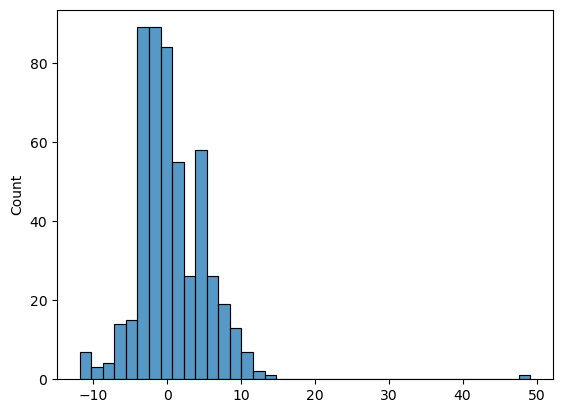

In [15]:
#visualize residuals as a histogram
sns.histplot(residuals)

#residuals seems to be somewhat normally distributed around 0. 

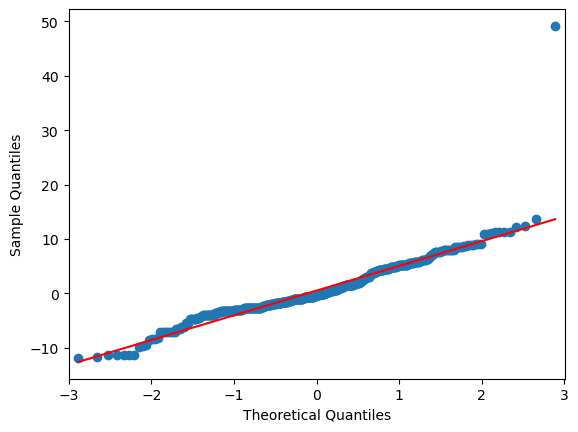

In [16]:
#To see if variables are within the same population 
sm.qqplot(residuals, line='r')
plt.show()

# Qqplot is very tight with one outlier at 3

In [17]:
#Formal test for homoscediscity 
scipy.stats.shapiro(residuals)

#p-value less than 0.05. Data is not normally distributed. This is due to outlier point at quantile 3.

ShapiroResult(statistic=0.8823033571243286, pvalue=2.5811219757012793e-19)

In [18]:
#bresuch test for homoscdiscity

stat, p, f_stat, f_p = sm.stats.diagnostic.het_breuschpagan(residuals, results.model.exog)
print(p)

#p-value is less than 0.05, heteroskedasticity assumed, reject null hypothesis that data is homosckedastic. 

1.1788285655522089e-09


In [19]:
#Create the model predictor here:
m_lst = results.params[['DC','month_num']]
print(m_lst)

DC          -0.000428
month_num    1.167389
dtype: float64


In [23]:
#Test cases using model predictor
x_lst = [94.3,3]

predictions = [m*x for m,x in zip(m_lst,x_lst)]
sum_predictions = sum(predictions)

predicted_value= sum_predictions
print(predicted_value)

3.461847483012325


model predicted 3.5, actual = 5.1

In [21]:
new_X = pd.DataFrame({'X1': np.linspace(start=1, stop=800,num=100), # DC
                      'X2': np.linspace(start=1,stop=12,num=100), # month
                              })

In [22]:
predictions = results.predict(new_X, transform = True)

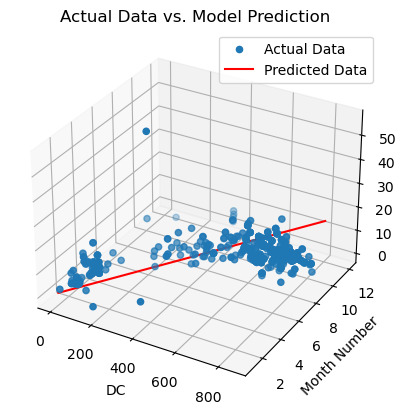

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')

# Plot the scatter plot
ax.scatter(x['DC'], x['month_num'], y, label='Actual Data')
ax.plot(new_X['X1'], new_X['X2'], predictions, color='red', label='Predicted Data')

ax.set_xlabel('DC')
ax.set_ylabel('Month Number')
ax.set_zlabel('ISI')
ax.legend()
ax.set_title('Actual Data vs. Model Prediction')

plt.show()
#plt.scatter(X[], y, label ='Actual Data')

# Final model Equation:
## ISI = (-0.000428*DC) + (1.167389*month number) 